## Data overview 

In [365]:

import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
import numpy as np
%matplotlib notebook


df = pd.read_csv("droptime.csv")
df.plot()

,order_id,customer_id,sector_id,planned_delivery_duration,product_id,weight,quantity,segment_id,driver_id,segment_type,segment_start_time,segment_end_time,delivery_duration,delivery_minutes
0,1312,149,1,175,30,818,1,0,4,STOP,2024-02-09 14:58:42,2024-02-09 15:01:56,194,4
1,1273,228,3,177,87,982,1,2,4,STOP,2024-02-24 09:26:31,2024-02-24 09:32:12,341,6
2,1273,228,3,177,95,1491,3,2,4,STOP,2024-02-24 09:26:31,2024-02-24 09:32:12,341,6
3,1273,228,3,177,56,318,1,2,4,STOP,2024-02-24 09:26:31,2024-02-24 09:32:12,341,6
4,1273,228,3,177,12,1447,2,2,4,STOP,2024-02-24 09:26:31,2024-02-24 09:32:12,341,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,2053,129,3,180,55,1734,3,4988,2,STOP,2024-02-07 20:23:11,2024-02-07 20:25:10,119,2
6783,2053,129,3,180,85,1493,1,4988,2,STOP,2024-02-07 20:23:11,2024-02-07 20:25:10,119,2
6784,2053,129,3,180,47,310,1,4988,2,STOP,2024-02-07 20:23:11,2024-02-07 20:25:10,119,2
6785,2053,129,3,180,11,338,1,4988,2,STOP,2024-02-07 20:23:11,2024-02-07 20:25:10,119,2


## Data preprocessing 

In [366]:
# Convert the datetime column to datetime format
df['start_time'] = pd.to_datetime(df['segment_start_time'])
df['end_time'] = pd.to_datetime(df['segment_end_time'])

# Extract date and hour into separate columns
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour
df['end_date'] = df['end_time'].dt.date
df['end_hour'] = df['end_time'].dt.hour
df = df.drop(["start_time","end_time","segment_start_time", "segment_end_time","segment_type"], axis=1)

#Add 'prediction_error' column with error in minutes
df['prediction_error'] = (df['delivery_duration'] - df['planned_delivery_duration'])/60
df

,order_id,customer_id,sector_id,planned_delivery_duration,product_id,weight,quantity,segment_id,driver_id,delivery_duration,delivery_minutes,start_date,start_hour,end_date,end_hour,prediction_error
0,1312,149,1,175,30,818,1,0,4,194,4,2024-02-09,14,2024-02-09,15,0.316667
1,1273,228,3,177,87,982,1,2,4,341,6,2024-02-24,9,2024-02-24,9,2.733333
2,1273,228,3,177,95,1491,3,2,4,341,6,2024-02-24,9,2024-02-24,9,2.733333
3,1273,228,3,177,56,318,1,2,4,341,6,2024-02-24,9,2024-02-24,9,2.733333
4,1273,228,3,177,12,1447,2,2,4,341,6,2024-02-24,9,2024-02-24,9,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,2053,129,3,180,55,1734,3,4988,2,119,2,2024-02-07,20,2024-02-07,20,-1.016667
6783,2053,129,3,180,85,1493,1,4988,2,119,2,2024-02-07,20,2024-02-07,20,-1.016667
6784,2053,129,3,180,47,310,1,4988,2,119,2,2024-02-07,20,2024-02-07,20,-1.016667
6785,2053,129,3,180,11,338,1,4988,2,119,2,2024-02-07,20,2024-02-07,20,-1.016667


## Features dependencies 

<IPython.core.display.Javascript object>


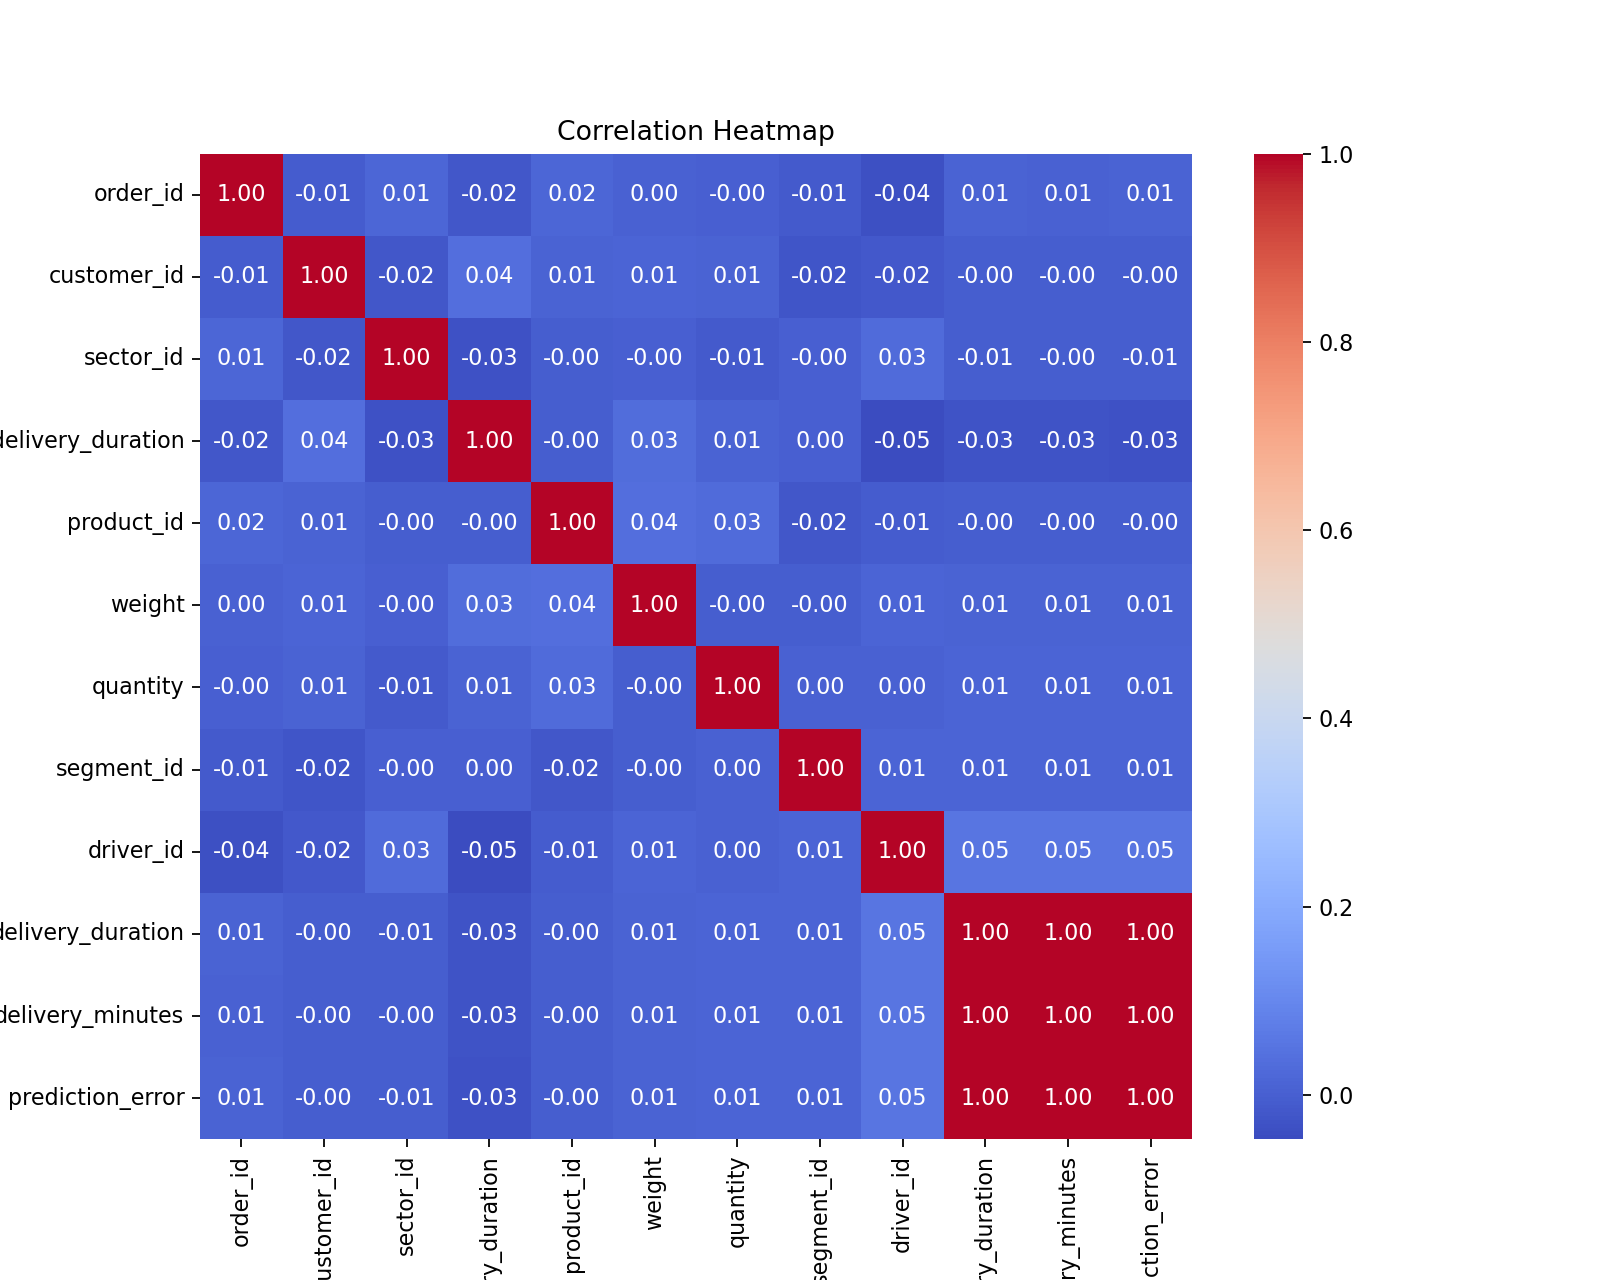

In [367]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Product Id 

<IPython.core.display.Javascript object>


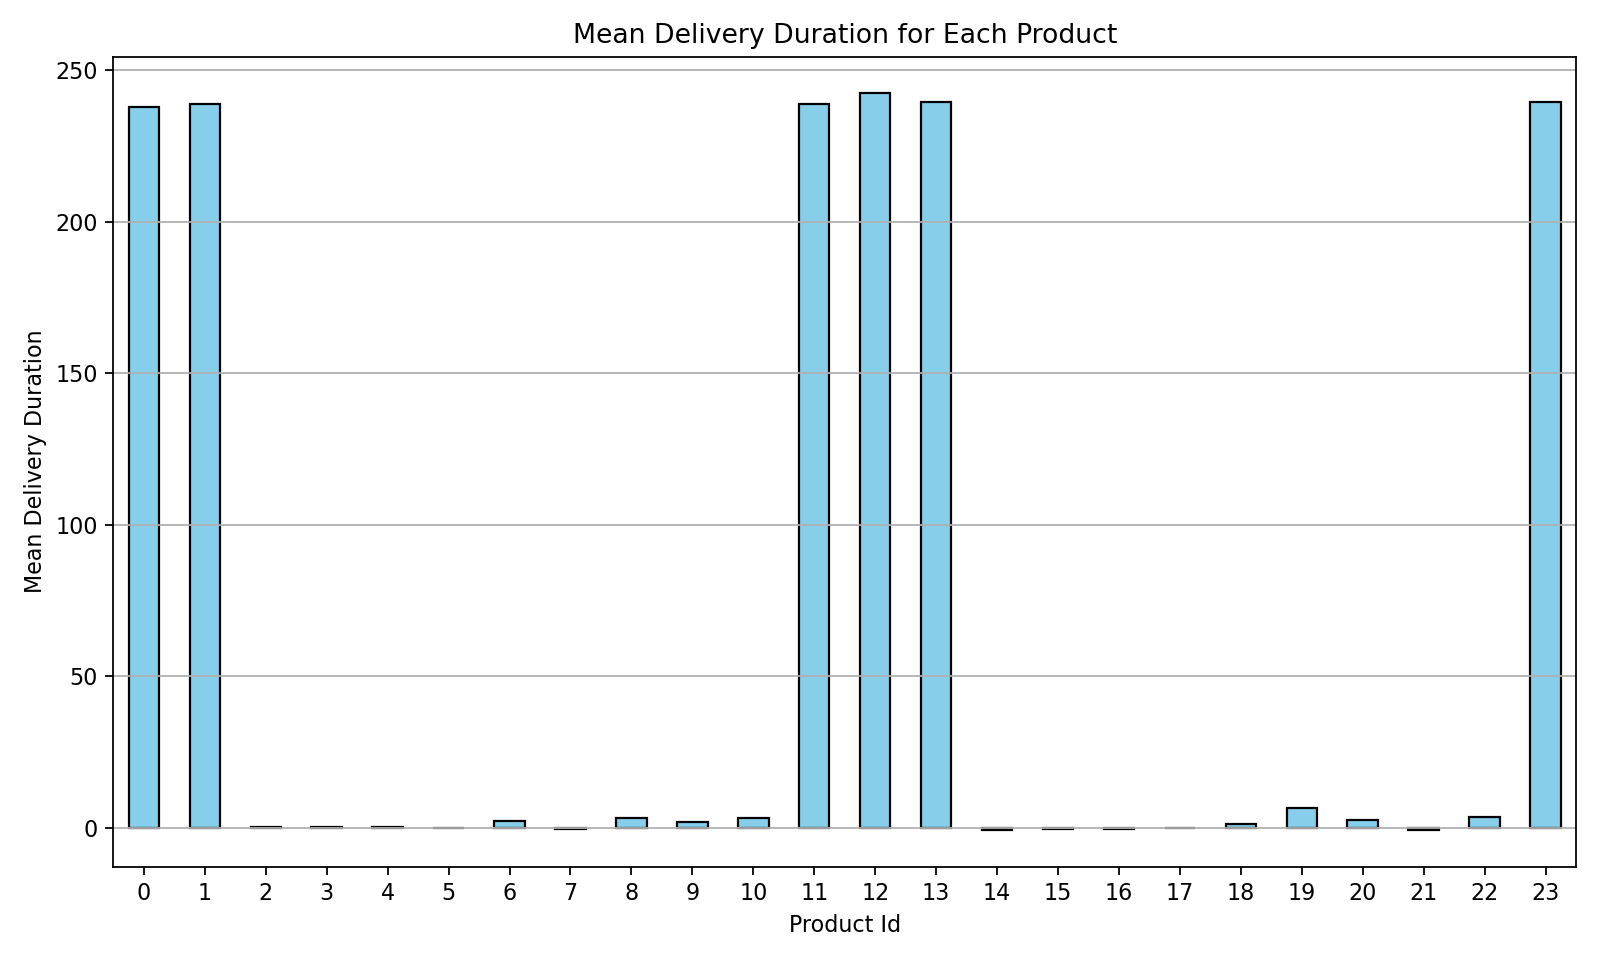

In [368]:
product_mean_delivery_duration = df.groupby('product_id')['delivery_duration'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
hourly_mean_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration for Each Product')
plt.xlabel('Product Id')
plt.ylabel('Mean Delivery Duration')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [369]:
df['total_weight'] = df['weight'] * df['quantity']

# # Group products by order_id and calculate the sum of total_weight for each order
order_total_weight = df.groupby('order_id')['total_weight'].sum().reset_index()

df = df.drop(['weight', 'quantity', 'product_id','total_weight'], axis=1)

# Merge total_weight back to the original DataFrame based on order_id
df = pd.merge(df, order_total_weight, on='order_id')
df = df.drop_duplicates()
df

,order_id,customer_id,sector_id,planned_delivery_duration,segment_id,driver_id,delivery_duration,delivery_minutes,start_date,start_hour,end_date,end_hour,prediction_error,total_weight
0,1312,149,1,175,0,4,194,4,2024-02-09,14,2024-02-09,15,0.316667,818
1,1273,228,3,177,2,4,341,6,2024-02-24,9,2024-02-24,9,2.733333,12321
6,1036,283,3,177,4,1,0,0,2024-02-24,20,2024-02-24,20,-2.950000,1977
8,2178,234,3,177,7,2,104,2,2024-02-23,9,2024-02-23,9,-1.216667,6916
10,331,272,3,178,10,4,175,3,2024-02-26,7,2024-02-26,7,-0.050000,3015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,1541,305,2,175,4980,3,249,5,2024-02-18,8,2024-02-18,8,1.233333,8438
6775,564,6,2,175,4982,3,137,3,2024-02-10,6,2024-02-10,6,-0.633333,1720
6776,1373,12,1,178,4984,4,547,10,2024-02-20,16,2024-02-20,16,6.150000,18189
6781,1879,43,1,178,4986,4,280,5,2024-02-20,19,2024-02-20,19,1.700000,4470


### Start/End hour 

<IPython.core.display.Javascript object>


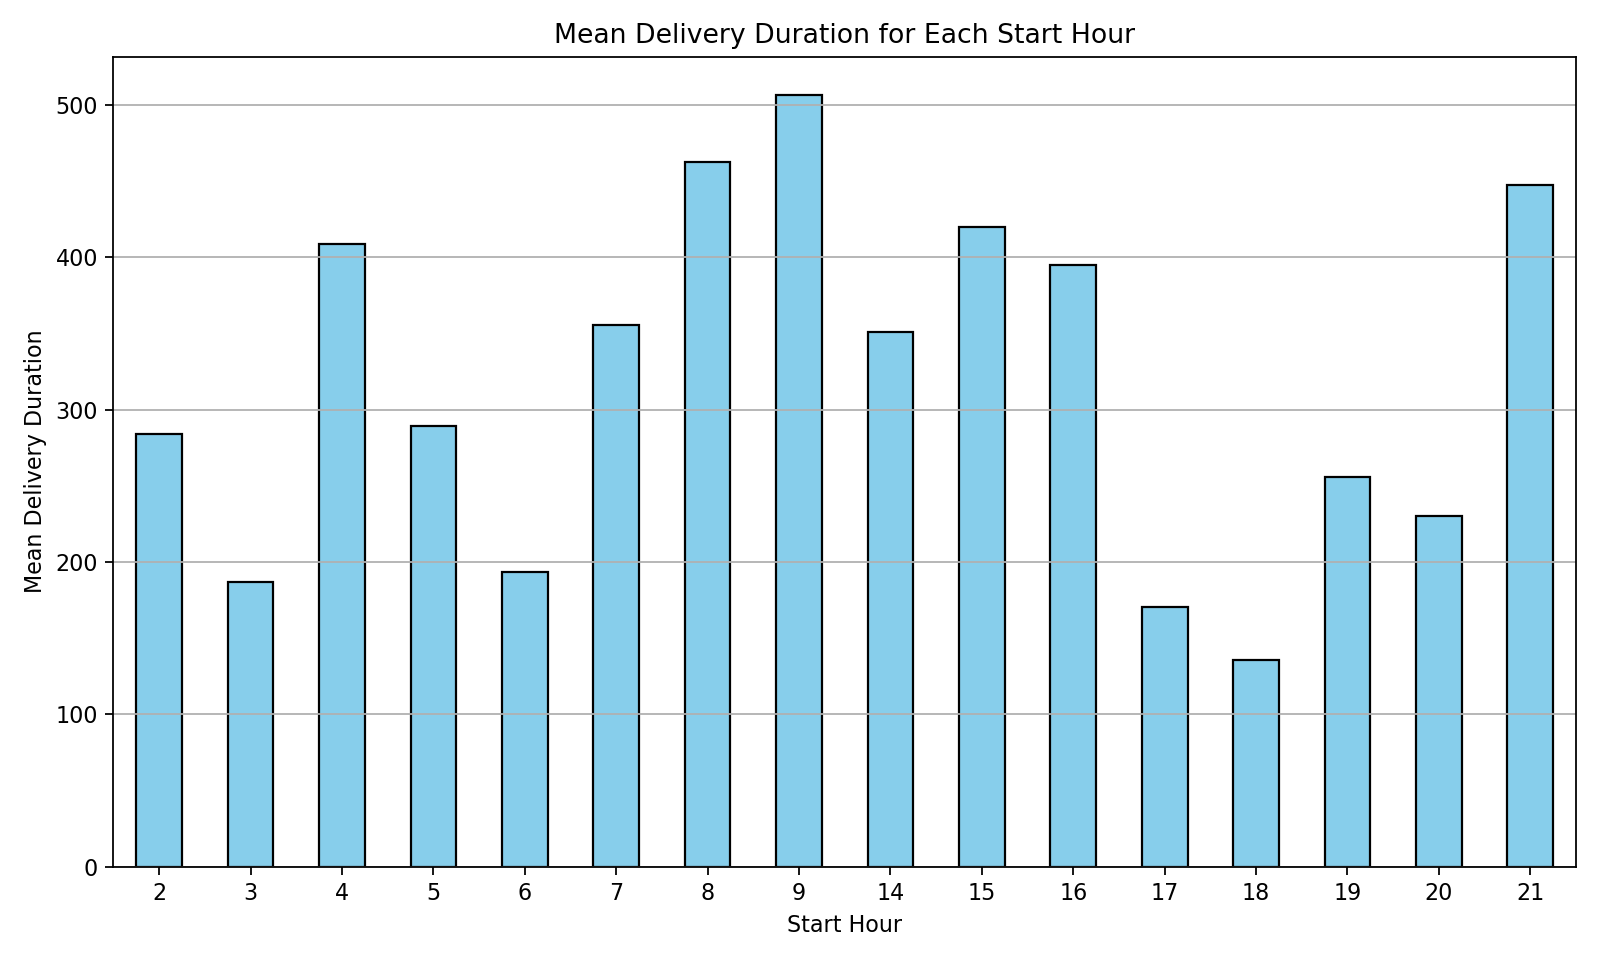

In [370]:
hourly_mean_delivery_duration = df.groupby('start_hour')['delivery_duration'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
hourly_mean_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration for Each Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Mean Delivery Duration')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


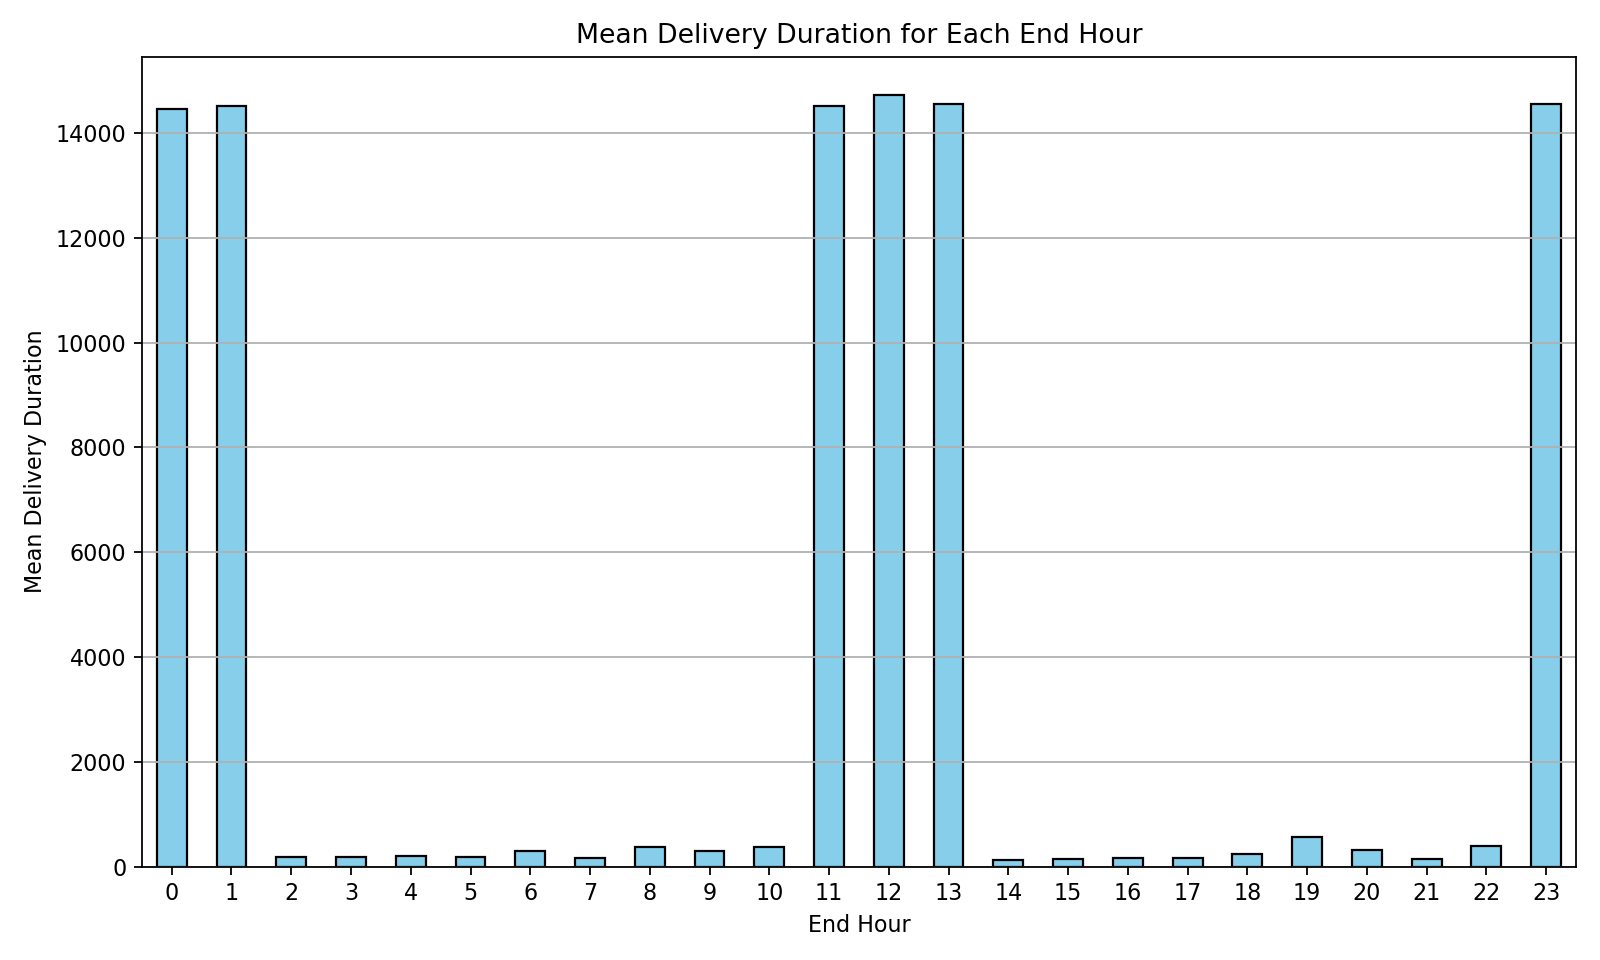

In [371]:
hourly_mean_delivery_duration = df.groupby('end_hour')['delivery_duration'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
hourly_mean_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration for Each End Hour')
plt.xlabel('End Hour')
plt.ylabel('Mean Delivery Duration')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


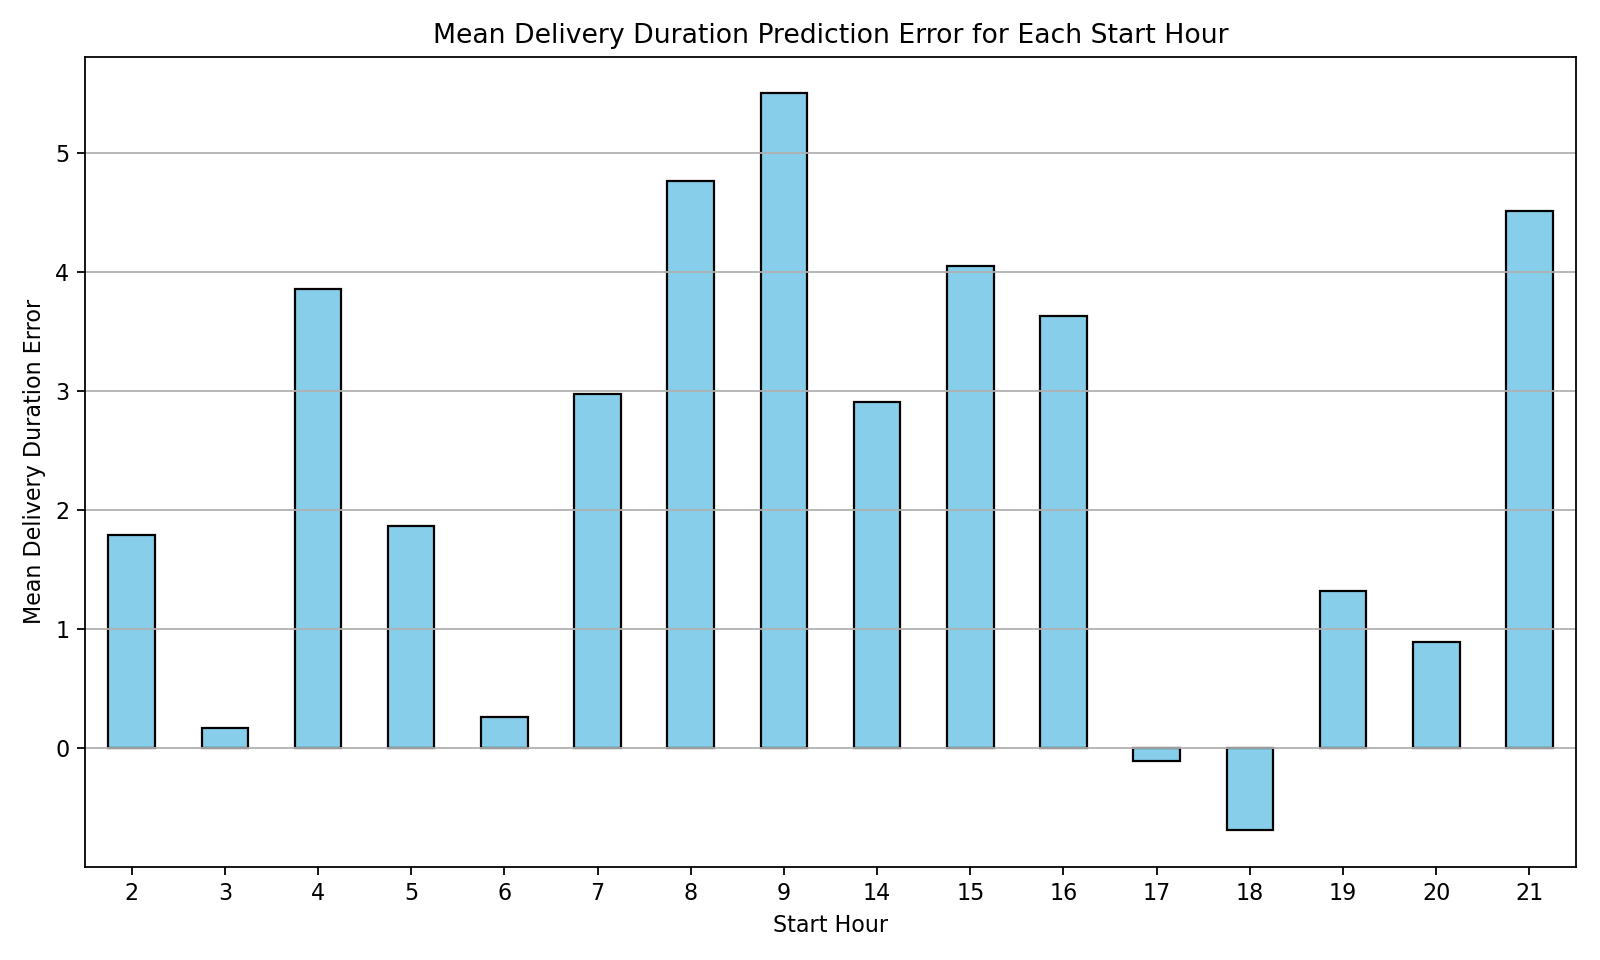

In [372]:
hourly_mean_delivery_duration = df.groupby('start_hour')['prediction_error'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
hourly_mean_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration Prediction Error for Each Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Mean Delivery Duration Error')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


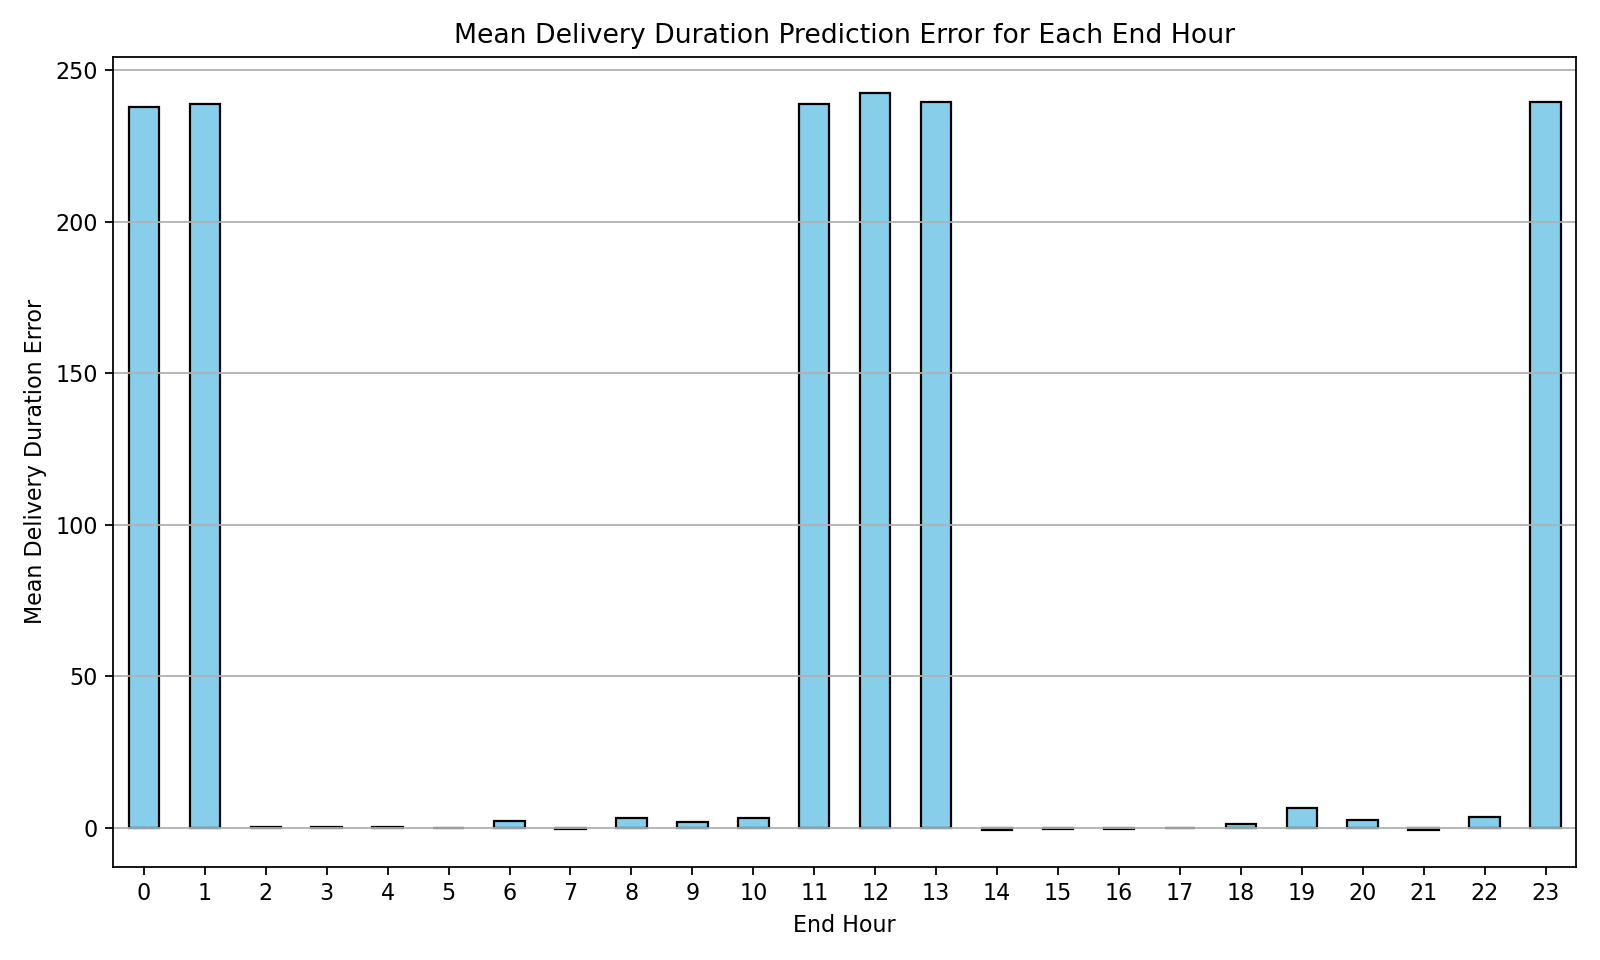

In [373]:
hourly_mean_delivery_duration = df.groupby('end_hour')['prediction_error'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
hourly_mean_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration Prediction Error for Each End Hour')
plt.xlabel('End Hour')
plt.ylabel('Mean Delivery Duration Error')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Segment and Driver


In [374]:
segment_mean_delivery_duration_error = df.groupby('segment_id')['prediction_error'].mean()
#segments with mean prediction error over 30 minutes
segment_mean_delivery_duration_error = segment_mean_delivery_duration_error[segment_mean_delivery_duration_error > 30]
segments_error = segment_mean_delivery_duration_error.index

segment_mean_delivery_duration = df.groupby('segment_id')['delivery_duration'].mean()
#segments with mean prediction error over 30 minutes
segment_mean_delivery_duration = segment_mean_delivery_duration[segment_mean_delivery_duration > 30]
segments_duration = segment_mean_delivery_duration_error.index
intersection = segments_error.intersection(segments_duration)
intersection

Index([ 400,  656,  949, 1055, 1169, 1772, 1778, 1907, 1919, 1964, 2192, 2248,
       2370, 2686, 2775, 2786, 3114, 3207, 3348, 3883, 4139, 4191, 4797, 4936],
      dtype='int64', name='segment_id')

<IPython.core.display.Javascript object>


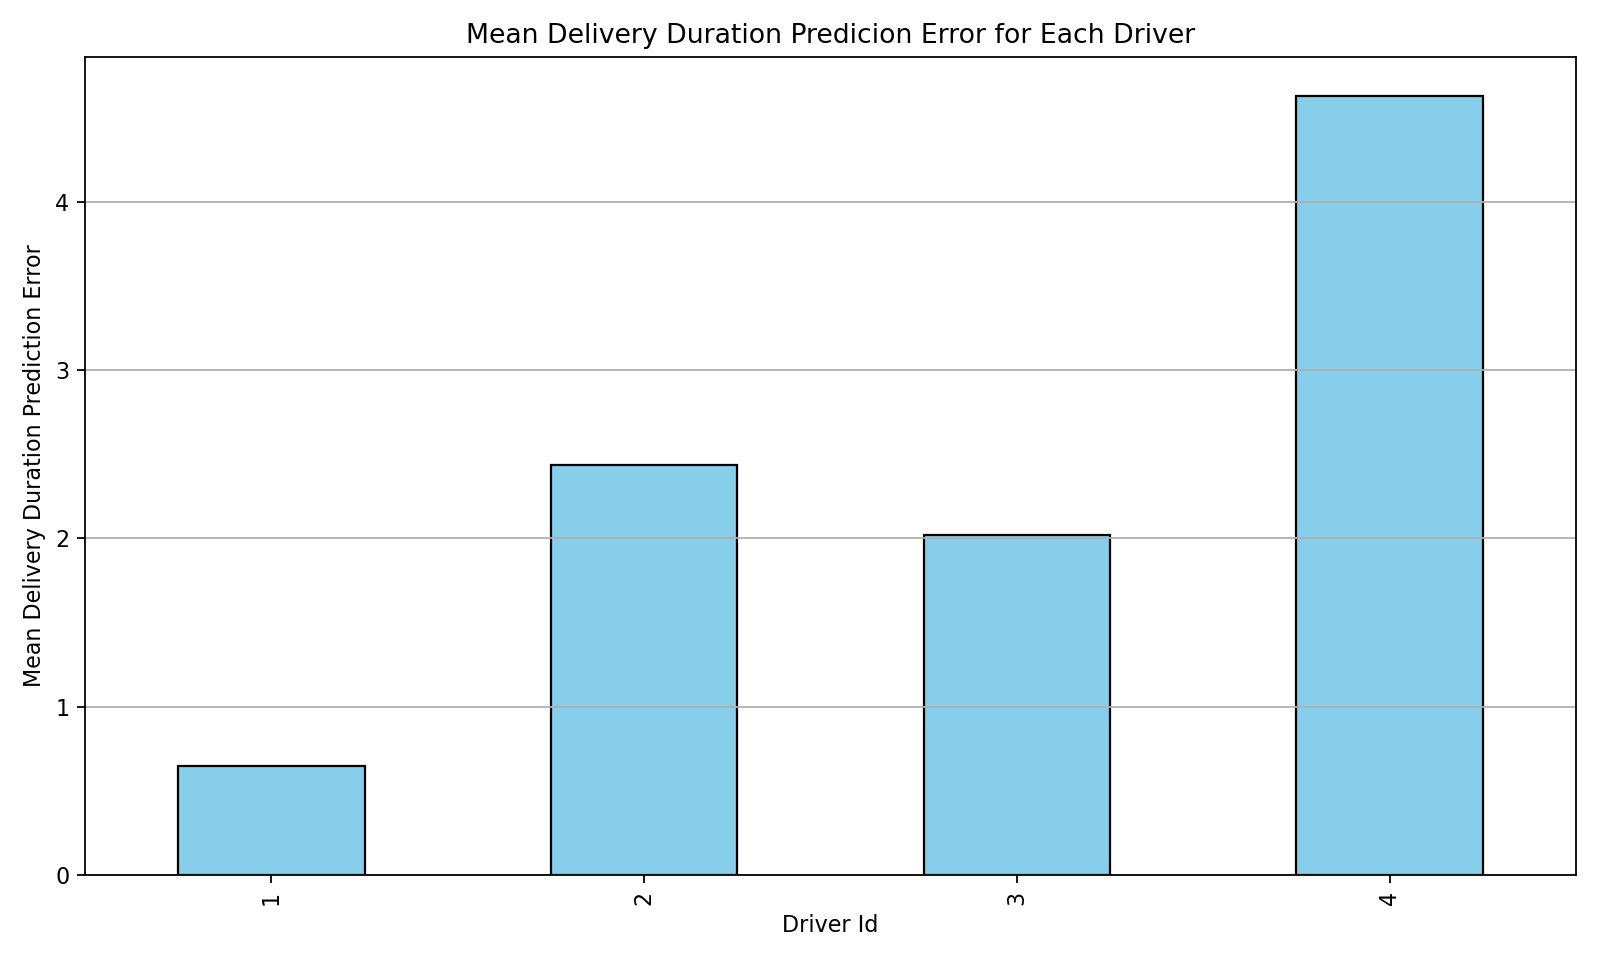

In [375]:
driver_delivery_duration = df.groupby('driver_id')['prediction_error'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
driver_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration Predicion Error for Each Driver')
plt.xlabel('Driver Id')
plt.ylabel('Mean Delivery Duration Prediction Error')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


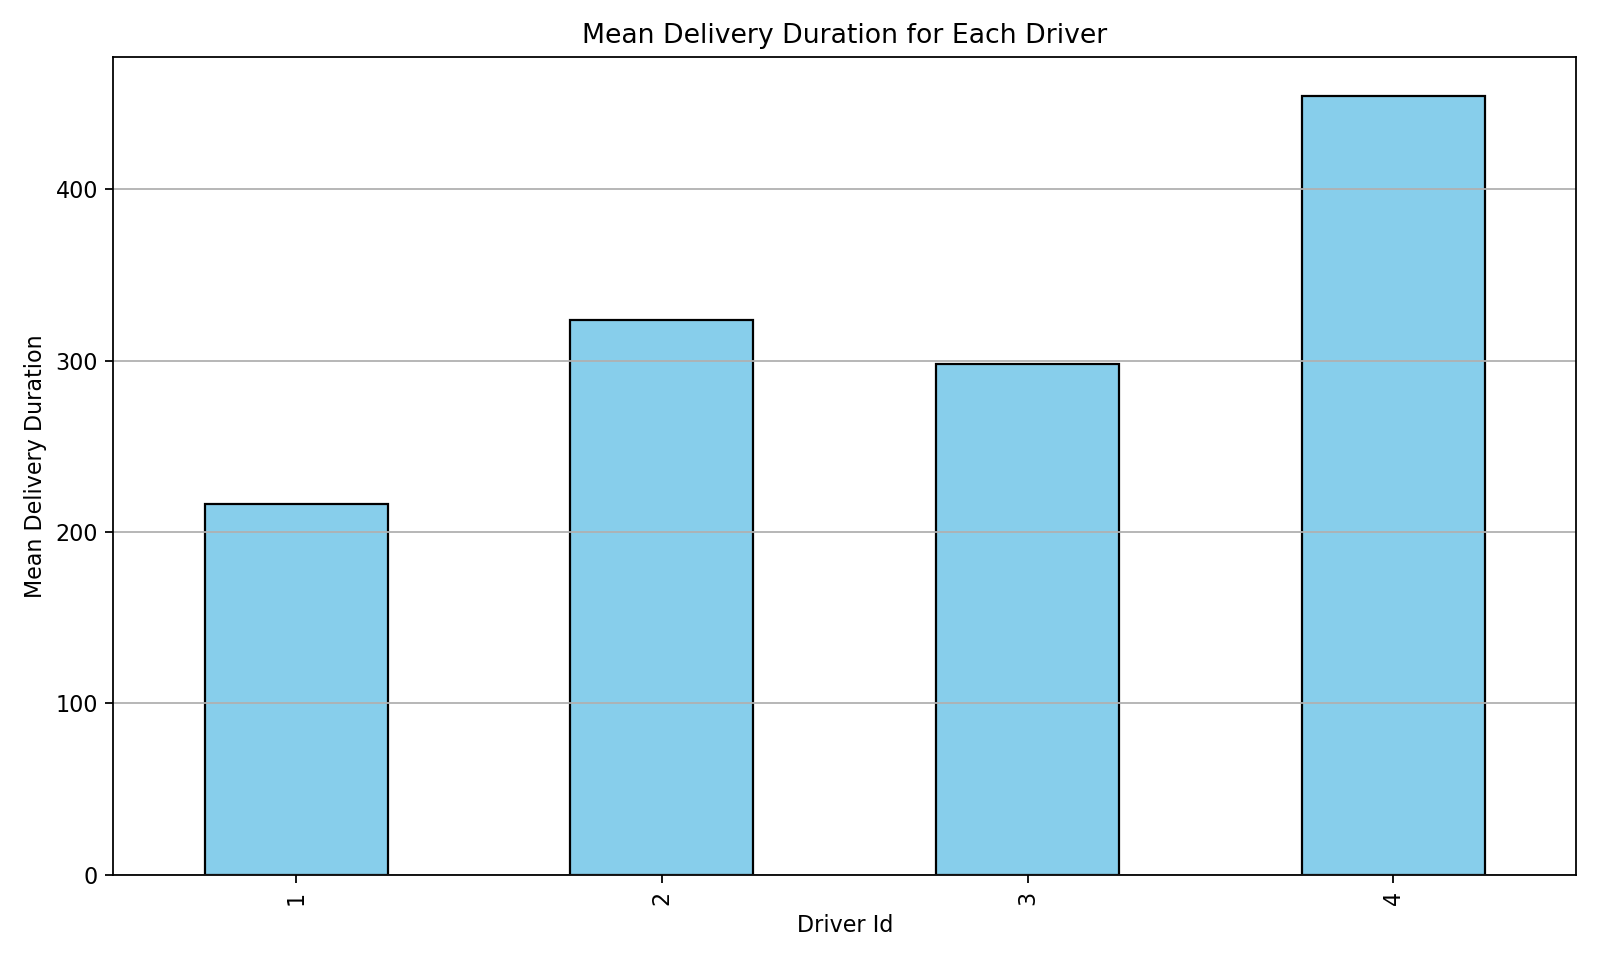

In [376]:
driver_delivery_duration = df.groupby('driver_id')['delivery_duration'].mean()

# Plot the mean delivery duration for each hour
plt.figure(figsize=(10, 6))
driver_delivery_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Delivery Duration for Each Driver')
plt.xlabel('Driver Id')
plt.ylabel('Mean Delivery Duration')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Delivery times distribution

<IPython.core.display.Javascript object>


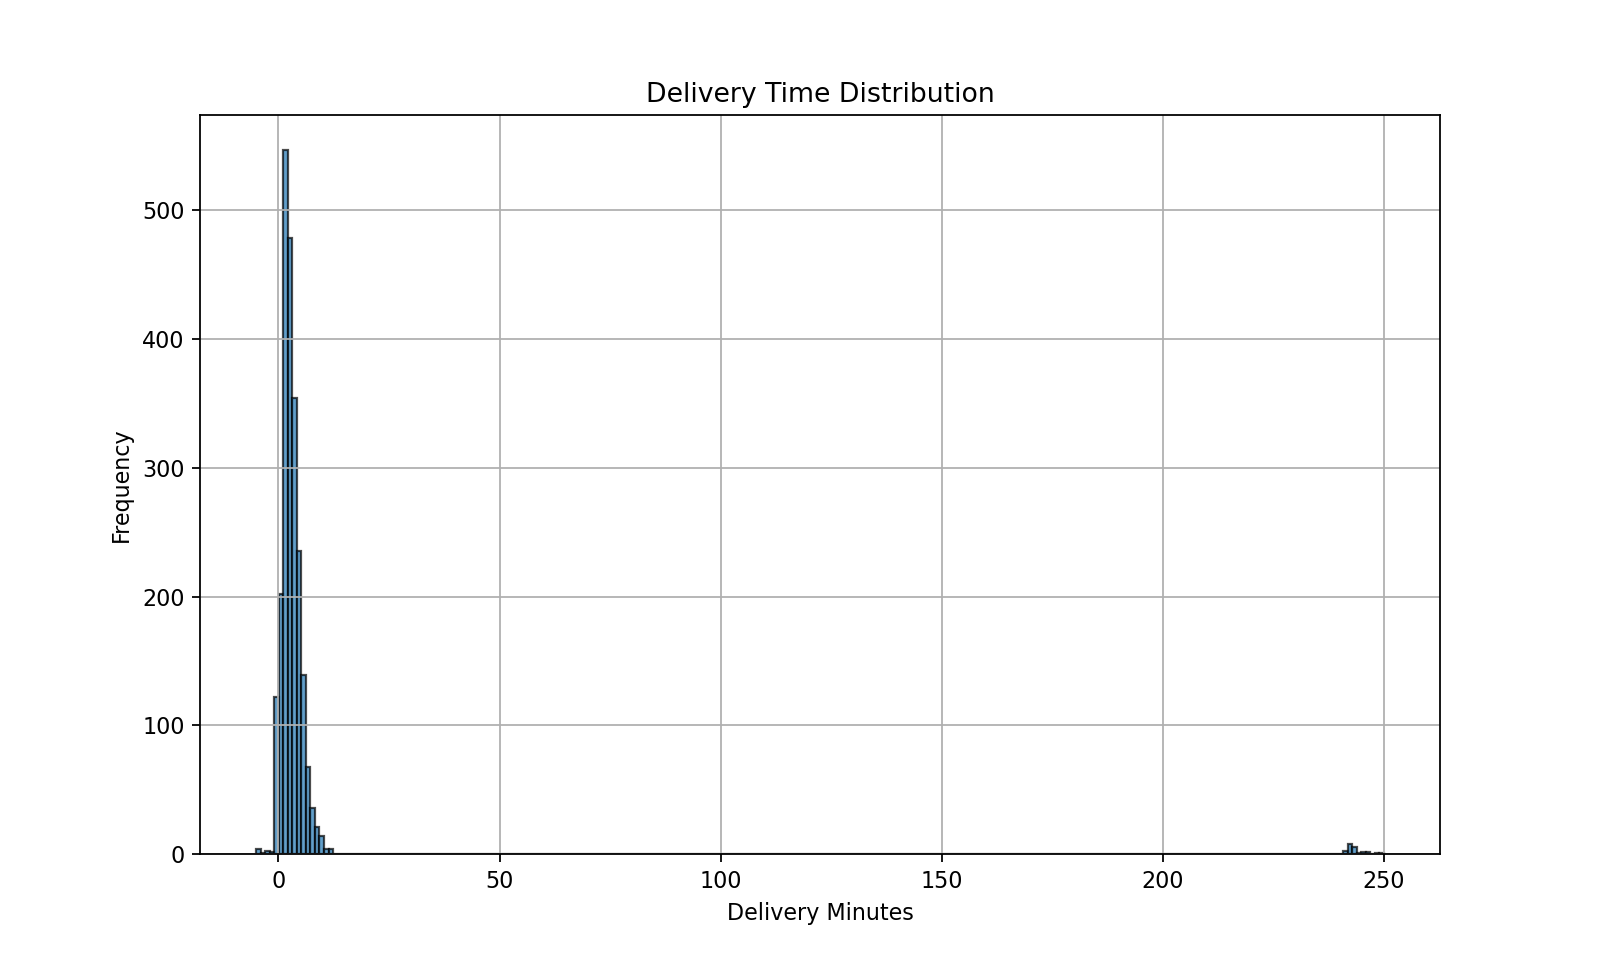

In [377]:
# Plot the histogram for delivery distribution
plt.figure(figsize=(10, 6))
bins_count =int(df['delivery_minutes'].max())
plt.hist(df['delivery_minutes'], bins=bins_count, edgecolor='black', alpha=0.7)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


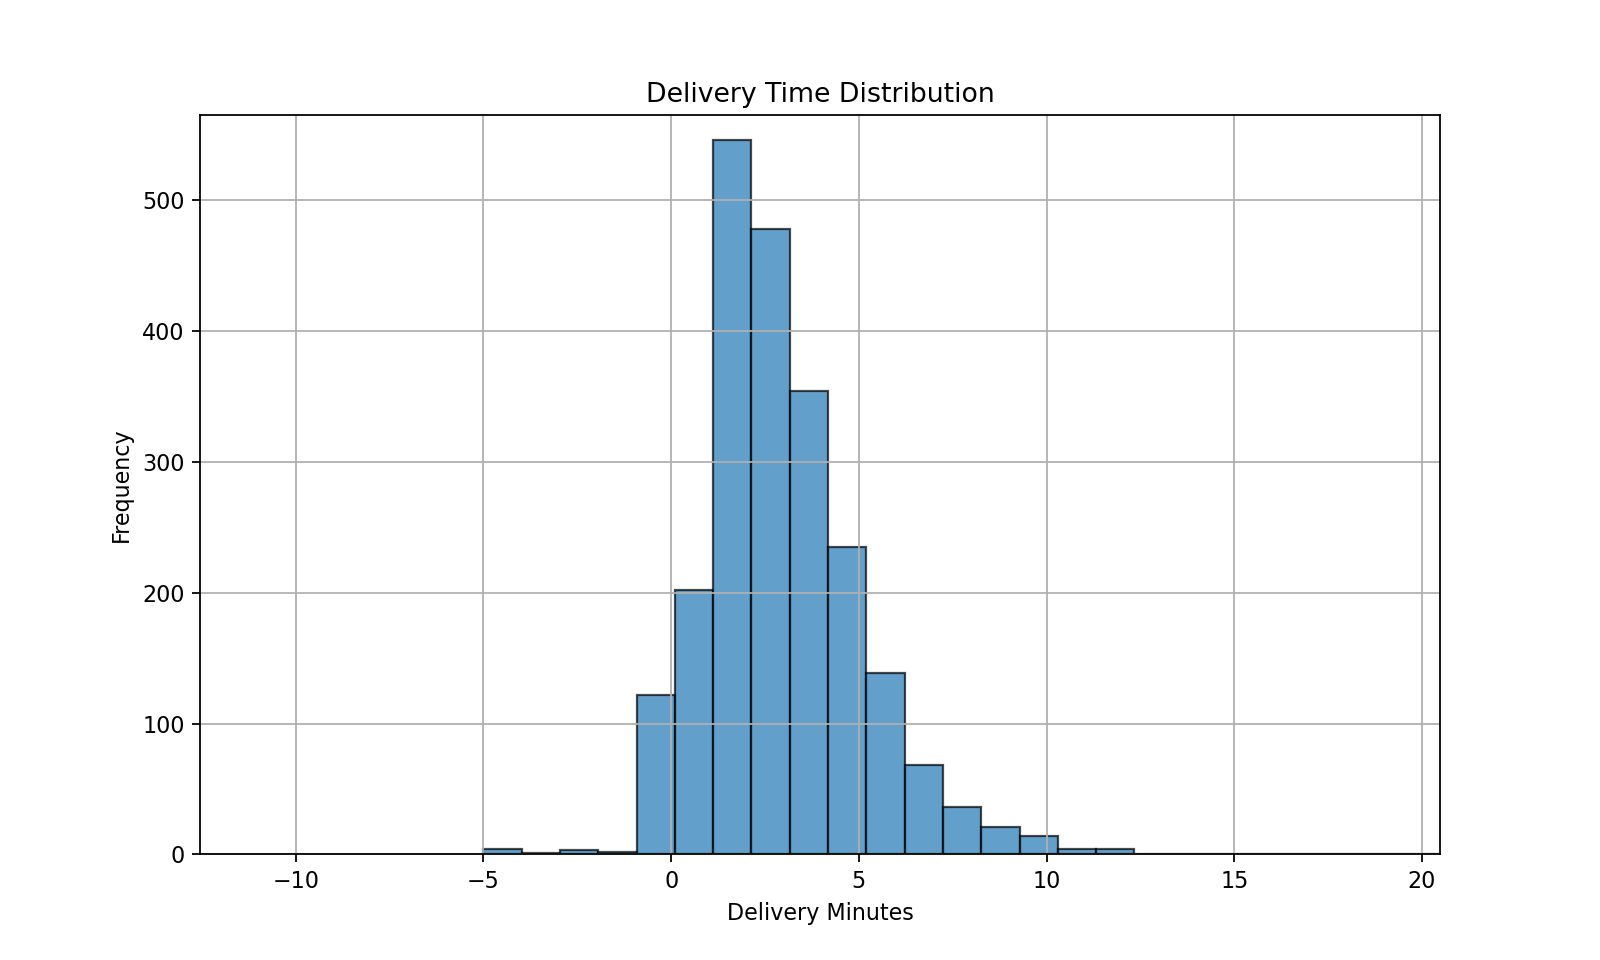

In [378]:
# Plot the histogram for delivery distribution
plt.figure(figsize=(10, 6))
bins_count =int(df['delivery_minutes'].max())
plt.hist(df['delivery_minutes'], bins=bins_count, edgecolor='black', alpha=0.7)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


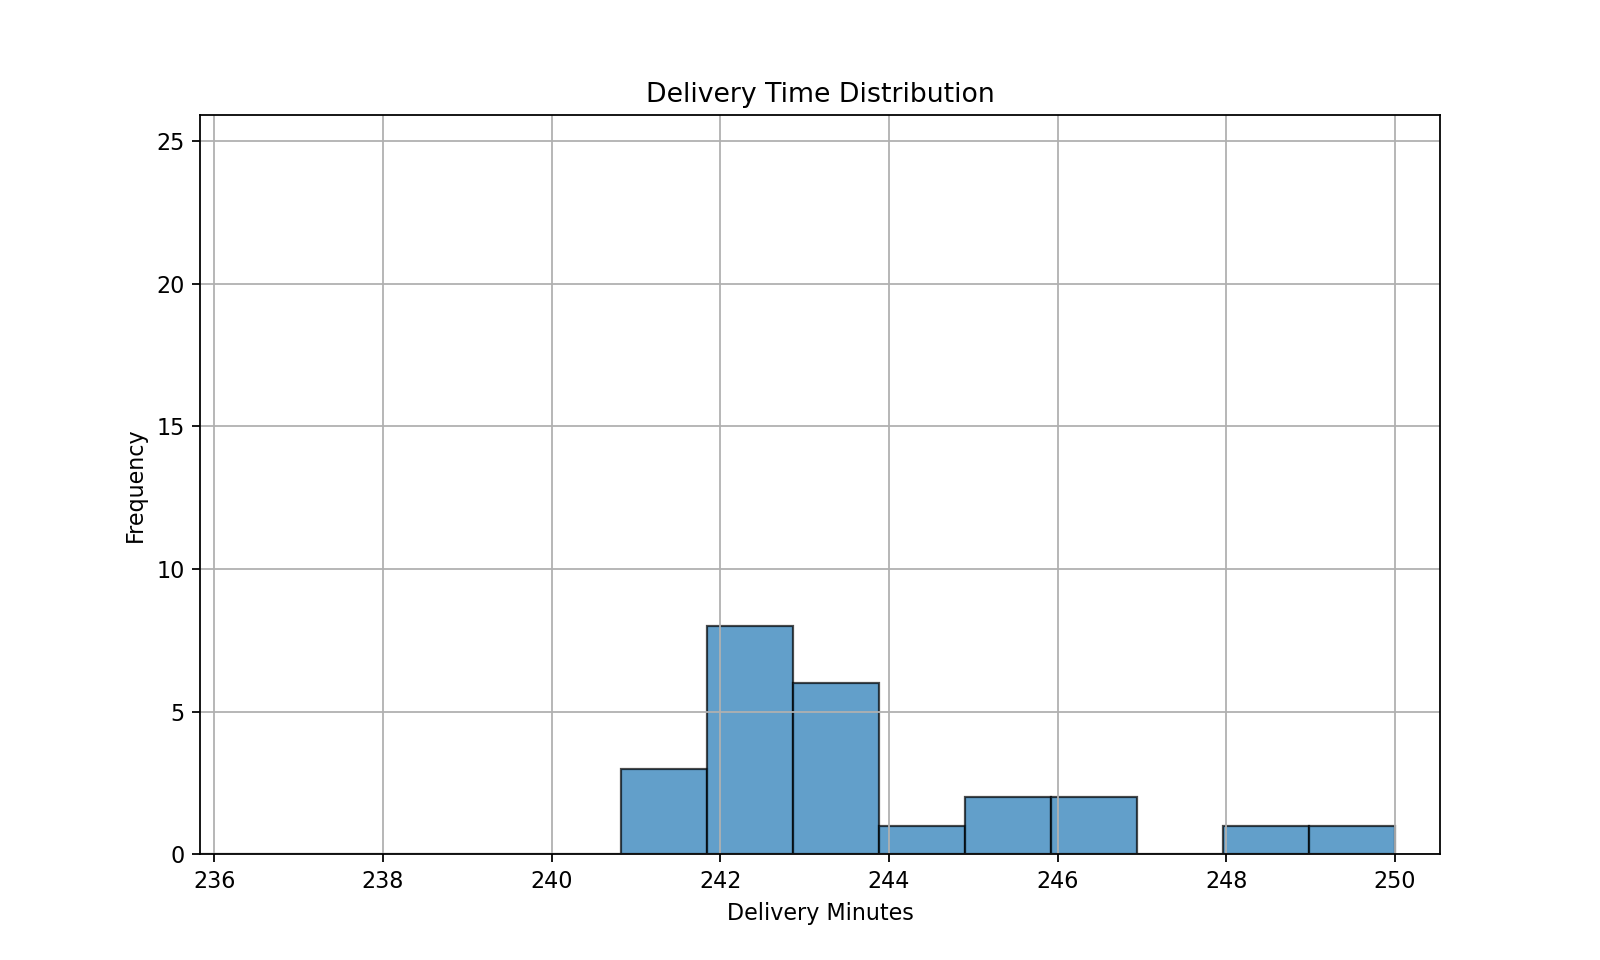

In [379]:
# Plot the histogram for delivery distribution
plt.figure(figsize=(10, 6))
bins_count =int(df['delivery_minutes'].max())
plt.hist(df['delivery_minutes'], bins=bins_count, edgecolor='black', alpha=0.7)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Maximal error: 246.1


<IPython.core.display.Javascript object>


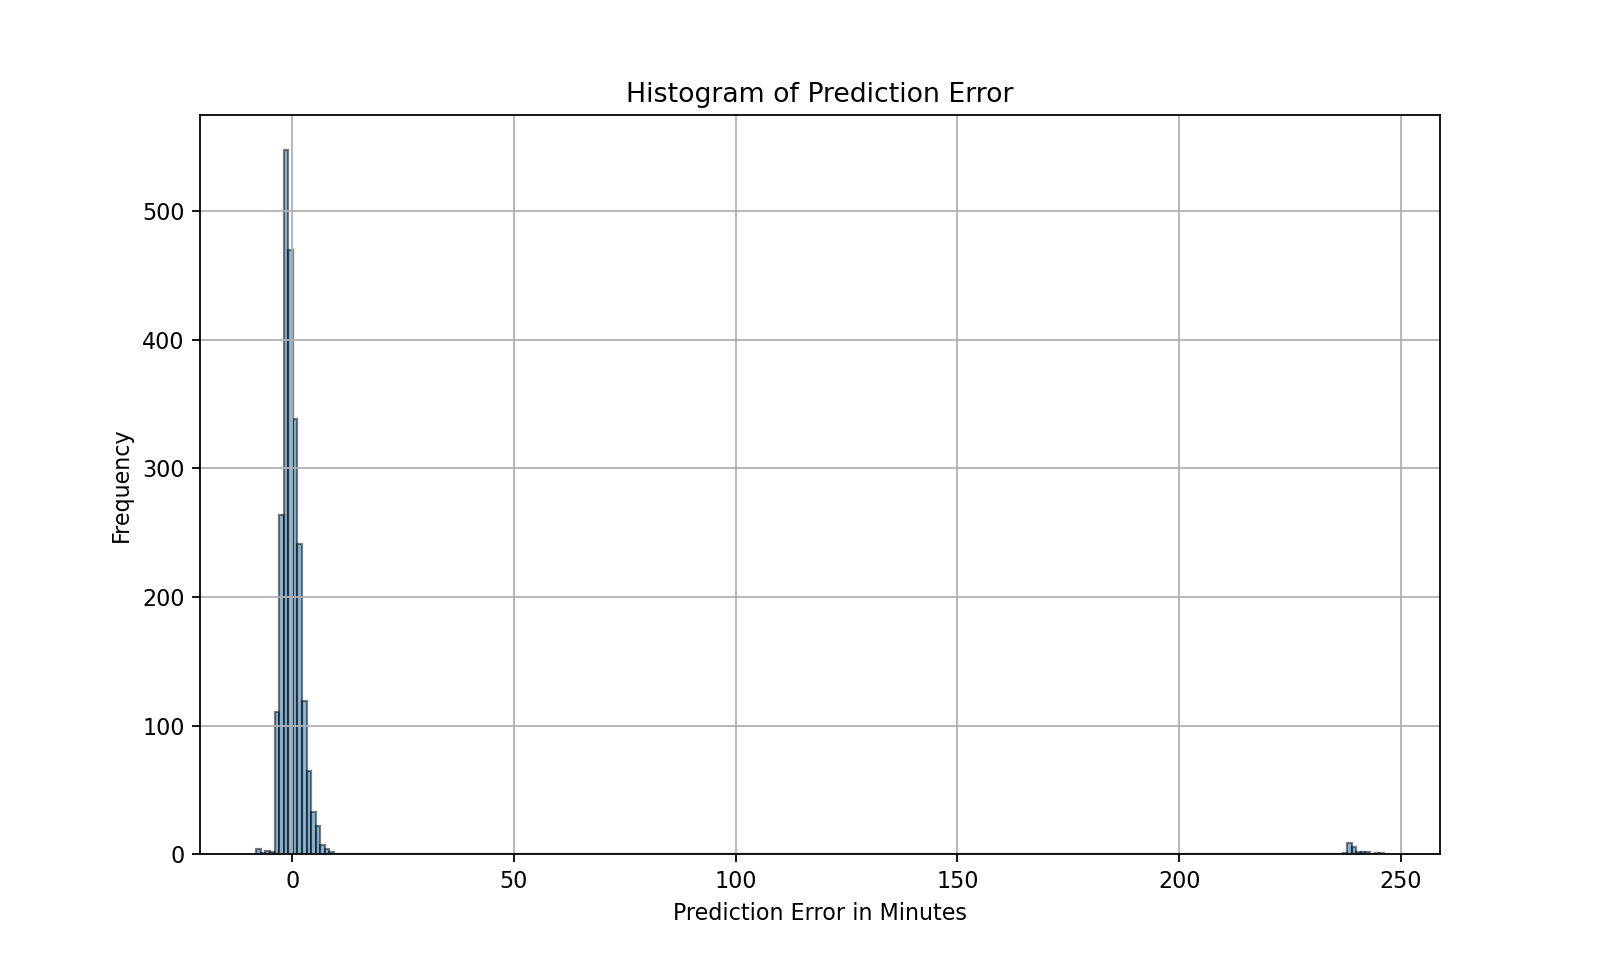

In [380]:
max_error = np.max(df['prediction_error'])
print(f"Maximal error: {max_error}")


# Plot the histogram for prediction error
plt.figure(figsize=(10, 6))
plt.hist(df['prediction_error'], bins=ceil(max(df['prediction_error'])), edgecolor='black', alpha=0.5, label='Prediction error in minutes')
plt.title('Histogram of Prediction Error')
plt.xlabel('Prediction Error in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


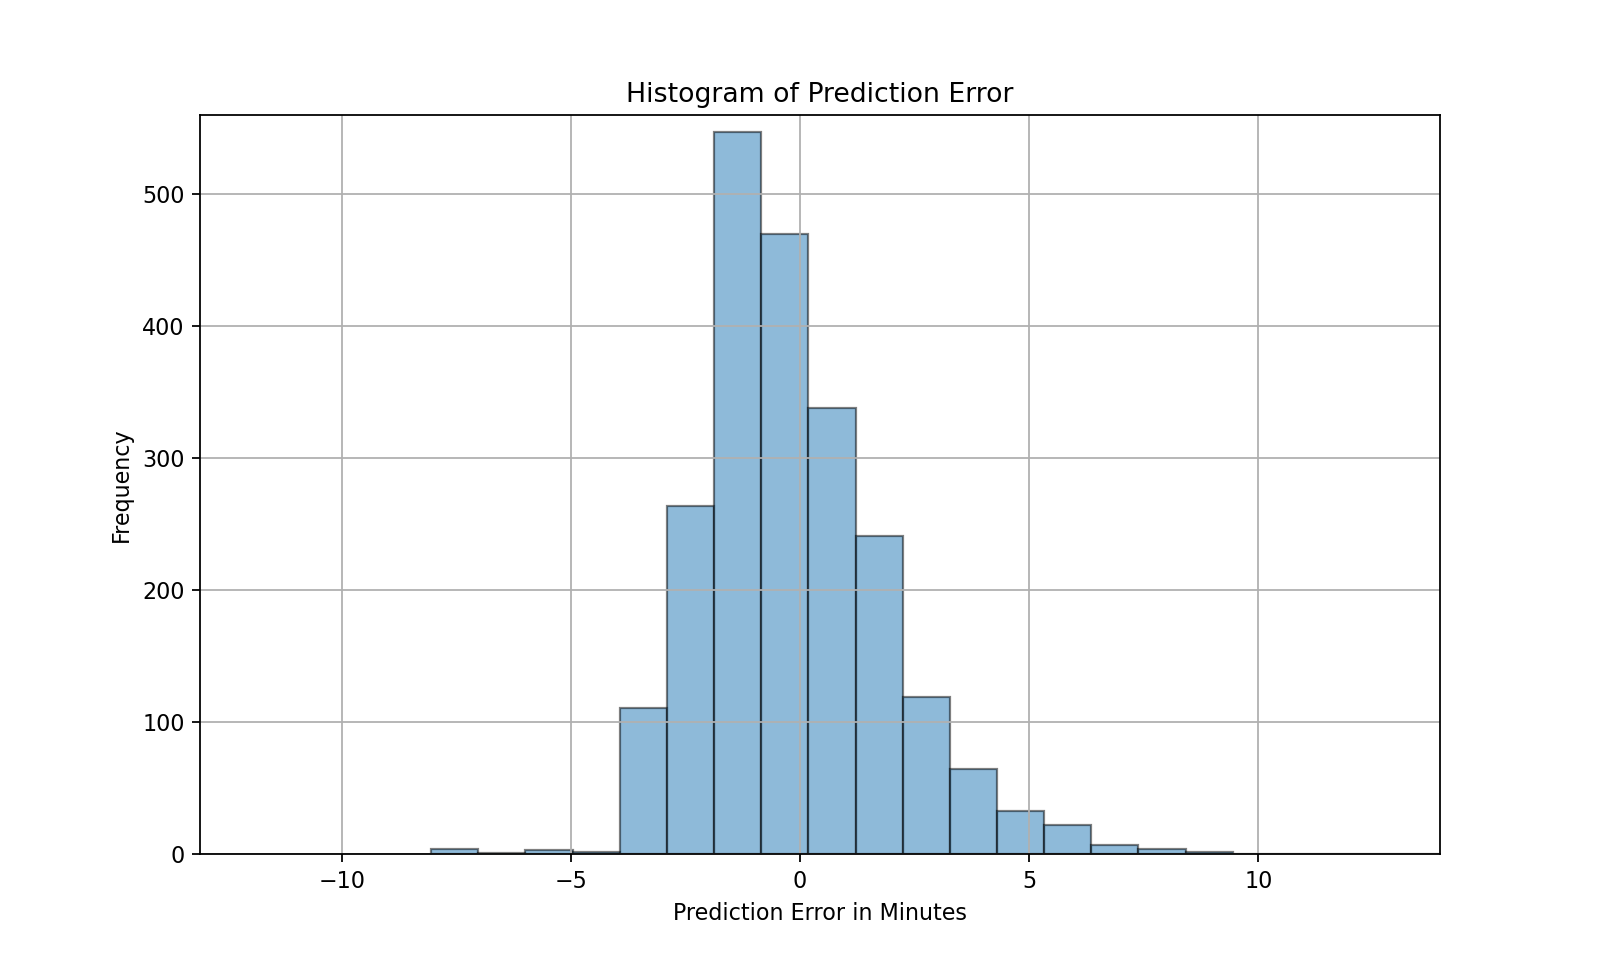

In [381]:
plt.figure(figsize=(10, 6))
plt.hist(df['prediction_error'], bins=ceil(max(df['prediction_error'])), edgecolor='black', alpha=0.5, label='Prediction error in minutes')
plt.title('Histogram of Prediction Error')
plt.xlabel('Prediction Error in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


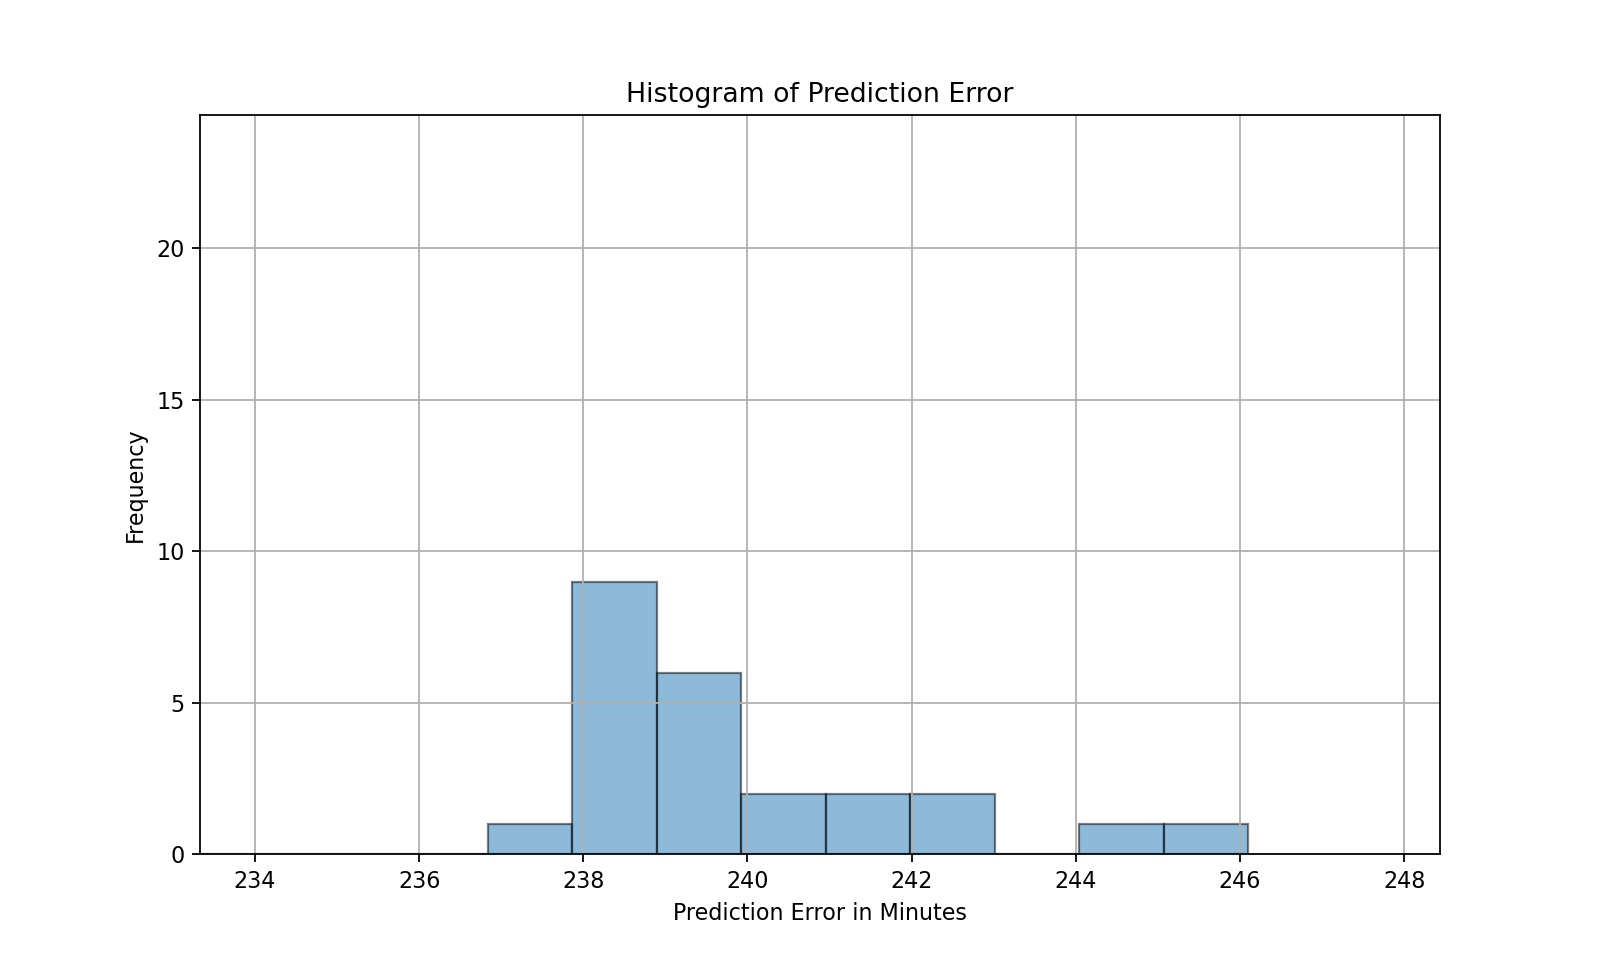

In [382]:
plt.figure(figsize=(10, 6))
plt.hist(df['prediction_error'], bins=ceil(max(df['prediction_error'])), edgecolor='black', alpha=0.5, label='Prediction error in minutes')
plt.title('Histogram of Prediction Error')
plt.xlabel('Prediction Error in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Delivery time by sector

<IPython.core.display.Javascript object>


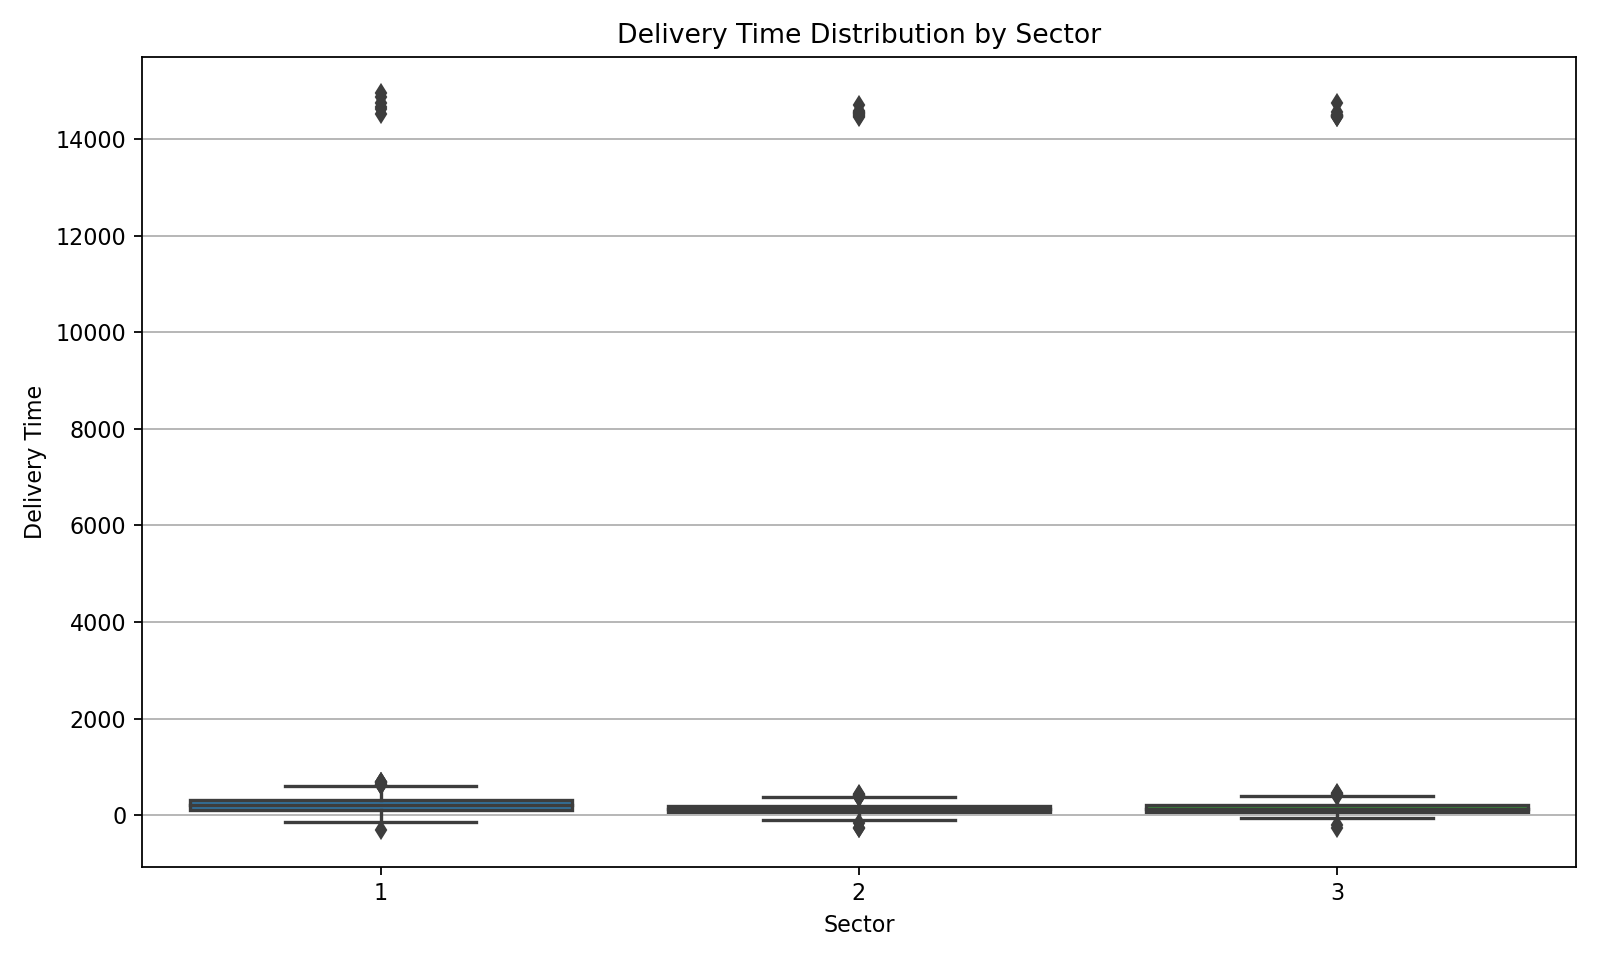

In [383]:
#box plot for sectors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sector_id', y='delivery_duration')
# Uncomment the line below to plot a violin plot instead
#sns.violinplot(data=df, x='sector_id', y='delivery_duration', inner='quartile')

plt.title('Delivery Time Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Delivery Time')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


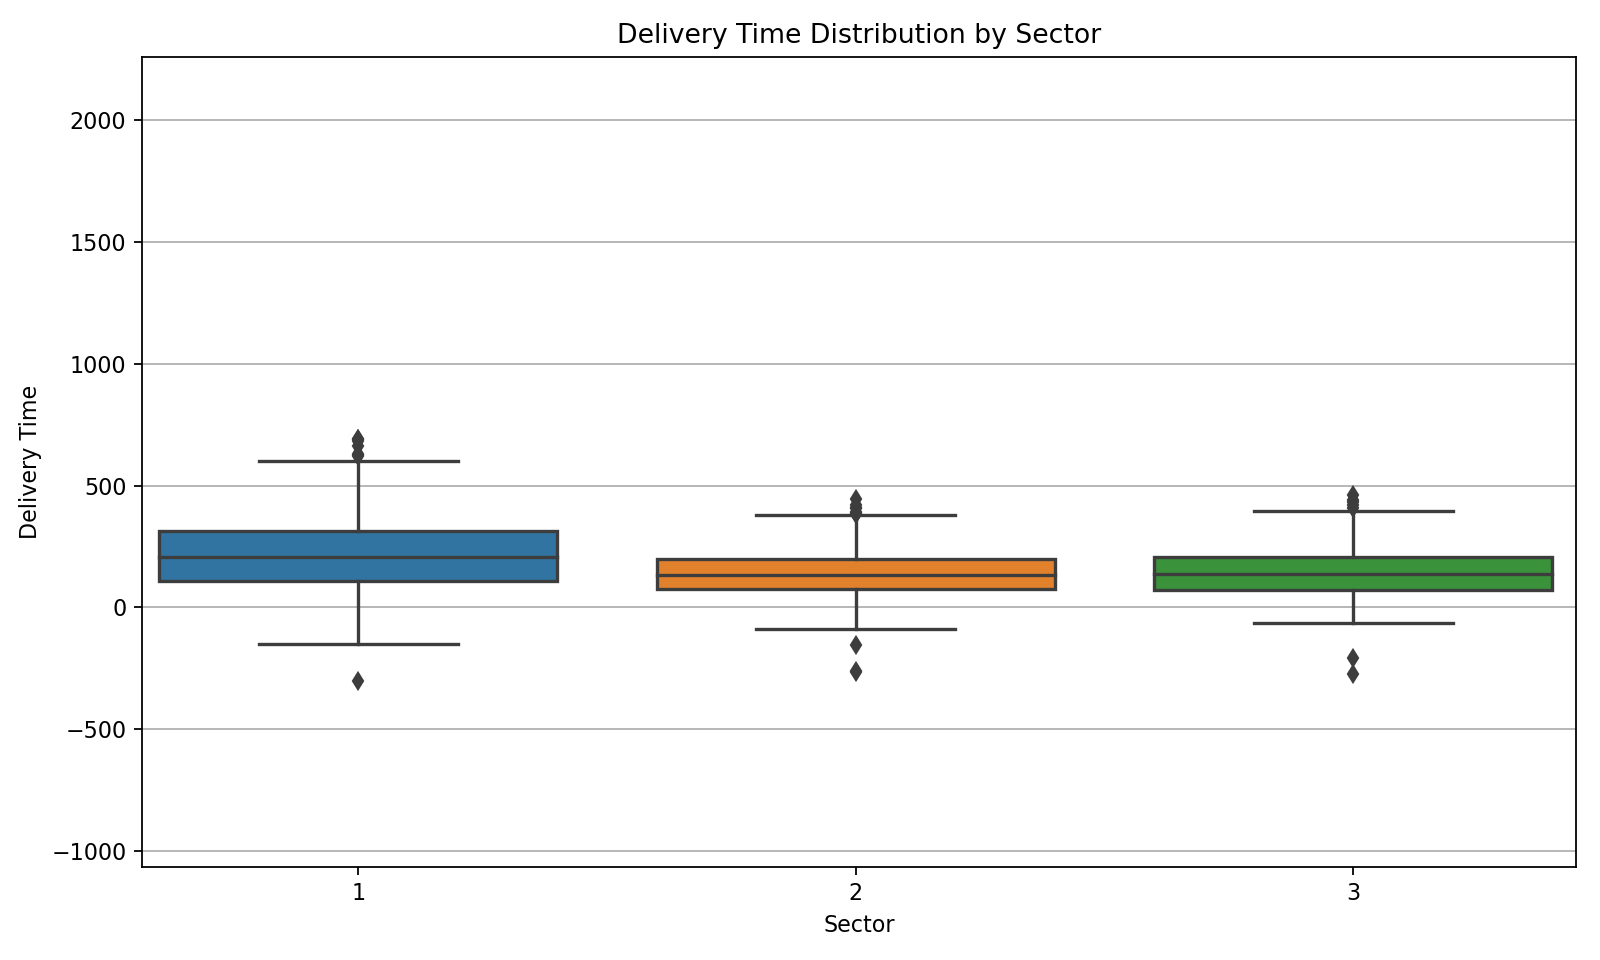

In [384]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sector_id', y='delivery_duration')
# Uncomment the line below to plot a violin plot instead
#sns.violinplot(data=df, x='sector_id', y='delivery_duration', inner='quartile')

plt.title('Delivery Time Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Delivery Time')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


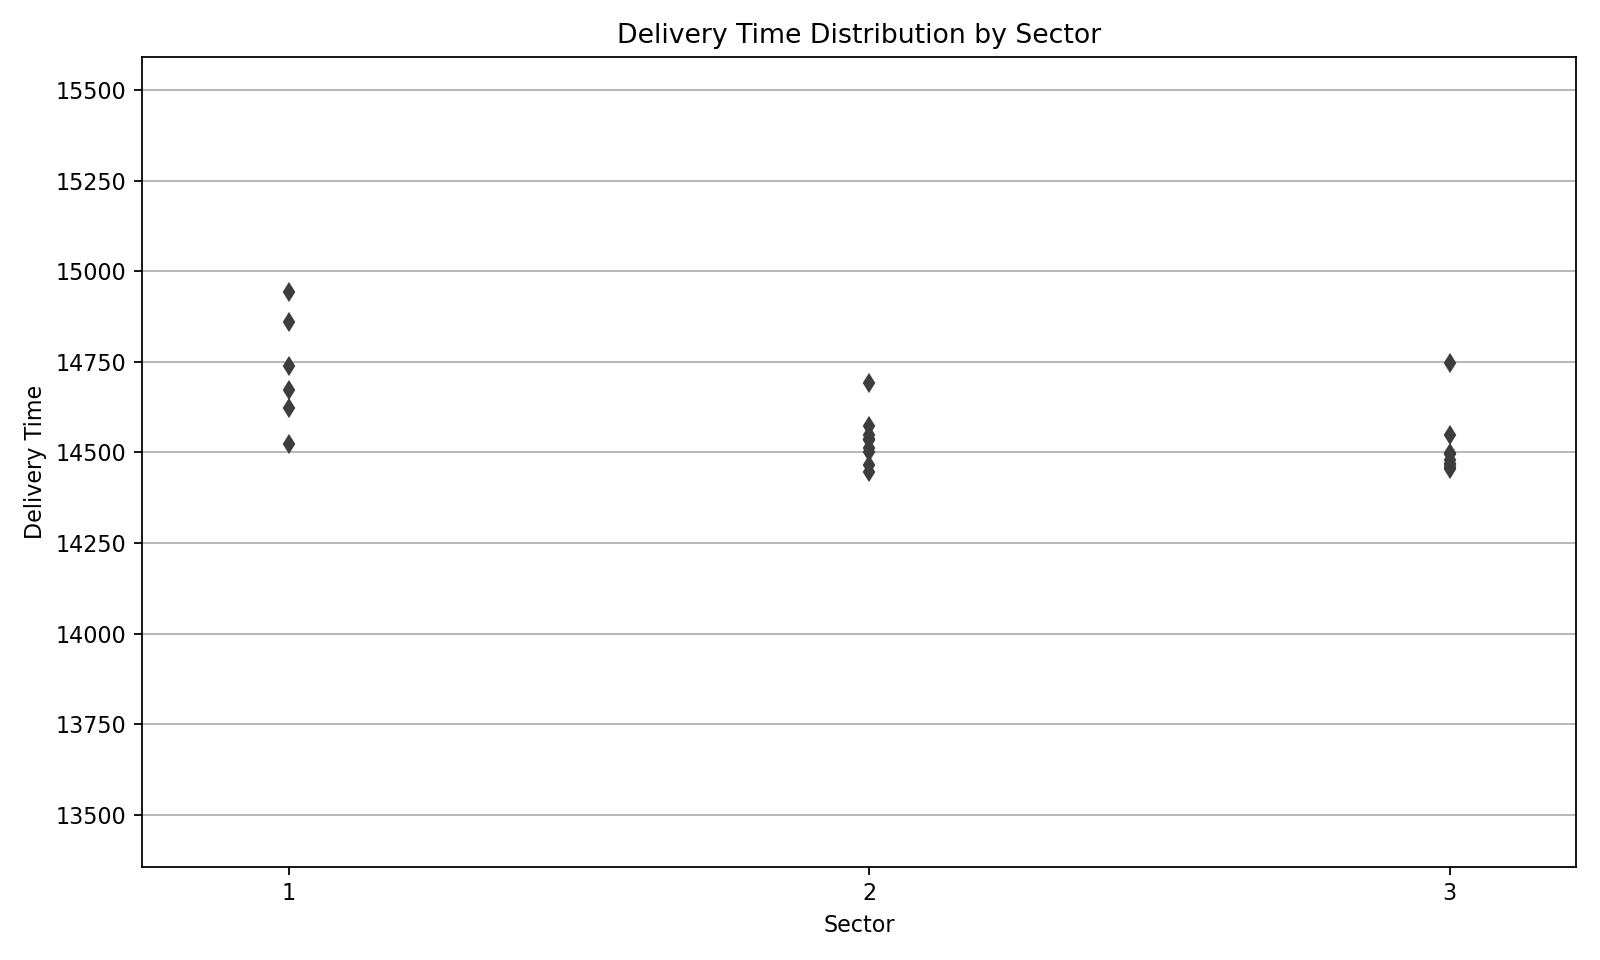

In [385]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sector_id', y='delivery_duration')
# Uncomment the line below to plot a violin plot instead
#sns.violinplot(data=df, x='sector_id', y='delivery_duration', inner='quartile')

plt.title('Delivery Time Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Delivery Time')
plt.grid(axis='y')
plt.tight_layout()
plt.show()